# 第一阶段：Data Profiling（数据画像）

## 📋 Notebook目标
本Notebook是数据准备流程的**第一步**，目标是全面了解数据的"原始状态"，为后续决策提供依据。

### 核心任务：
1. **数据完整性评估**：识别缺失值的类型、位置和严重程度
2. **数据分布分析**：理解数值和类别特征的分布特征
3. **数据质量问题记录**：系统化地记录所有发现的问题

### 为什么Data Profiling重要？
> "数据画像是数据科学项目的基石。没有全面的画像，我们无法做出正确的清洗决策，也无法评估模型结果的可靠性。"

**类比**：就像医生在治疗前必须做全面体检一样，数据科学家在处理数据前必须先"诊断"数据的健康状况。

---

## 📊 数据集背景
**Adult Income Dataset**（成人收入数据集）
- **来源**：1994年美国人口普查数据
- **预测目标**：个人年收入是否超过50K美元
- **特征类型**：
  - 人口统计学特征（年龄、性别、种族）
  - 教育背景
  - 工作信息
  - 家庭状况
  - 资本收益/损失

**社会意义**：
这个数据集被广泛用于研究收入不平等、教育回报、性别薪酬差距等社会经济问题。但同时，它也反映了1994年美国社会的历史偏见，这是我们在分析中必须审慎对待的。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. 数据加载

In [2]:
data_path = '../data/raw/adult.csv'
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset shape: (32561, 15)
Number of rows: 32561
Number of columns: 15


## 2. 数据集基本信息

In [3]:
print("\n=== First 5 Rows ===")
display(df.head())

print("\n=== Column Names ===")
print(df.columns.tolist())


=== First 5 Rows ===


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K



=== Column Names ===
['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


In [4]:
print("=== Data Types ===")
print(df.dtypes)

print("\n=== Data Info ===")
df.info()

=== Data Types ===
age               int64
workclass           str
fnlwgt            int64
education           str
education.num     int64
marital.status      str
occupation          str
relationship        str
race                str
sex                 str
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country      str
income              str
dtype: object

=== Data Info ===
<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  str  
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  str  
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  str  
 6   occupation      32561 non-null  str  
 7   relationship    32561 non-null  str  
 8   race            32561 non-null  str  
 9   sex         

## 3. 缺失值分析

### 3.1 识别缺失值模式
在这个数据集中，缺失值可能以多种形式存在：
- 标准的NaN/None
- 问号（"?"）
- 空字符串
- 其他占位符

In [5]:
def detect_missing_values(df):
    """
    Detect various forms of missing values in the dataset
    """
    missing_info = pd.DataFrame({
        'Column': df.columns,
        'Null_Count': df.isnull().sum(),
        'Null_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
        'Question_Mark_Count': (df == '?').sum(),
        'Question_Mark_Percentage': ((df == '?').sum() / len(df) * 100).round(2),
        'Unique_Values': df.nunique(),
        'Data_Type': df.dtypes
    })
    
    missing_info['Total_Missing'] = missing_info['Null_Count'] + missing_info['Question_Mark_Count']
    missing_info['Total_Missing_Percentage'] = (missing_info['Total_Missing'] / len(df) * 100).round(2)
    
    missing_info = missing_info.sort_values('Total_Missing_Percentage', ascending=False)
    
    return missing_info

missing_info = detect_missing_values(df)
print("=== Missing Values Analysis ===")
display(missing_info)

=== Missing Values Analysis ===


,Column,Null_Count,Null_Percentage,Question_Mark_Count,Question_Mark_Percentage,Unique_Values,Data_Type,Total_Missing,Total_Missing_Percentage
occupation,occupation,0,0.0,1843,5.66,15,str,1843,5.66
workclass,workclass,0,0.0,1836,5.64,9,str,1836,5.64
native.country,native.country,0,0.0,583,1.79,42,str,583,1.79
fnlwgt,fnlwgt,0,0.0,0,0.00,21648,int64,0,0.00
education,education,0,0.0,0,0.00,16,str,0,0.00
education.num,education.num,0,0.0,0,0.00,16,int64,0,0.00
age,age,0,0.0,0,0.00,73,int64,0,0.00
marital.status,marital.status,0,0.0,0,0.00,7,str,0,0.00
relationship,relationship,0,0.0,0,0.00,6,str,0,0.00
sex,sex,0,0.0,0,0.00,2,str,0,0.00


### 3.2 缺失值可视化

**📊 图表说明**：
- **左图（百分比）**：横向柱状图显示缺失比例，越长说明该字段缺失越严重
- **右图（计数）**：纵向柱状图显示缺失数量的绝对值
- **意义**：快速识别哪些字段需要优先处理（缺失率>5%需谨慎处理）

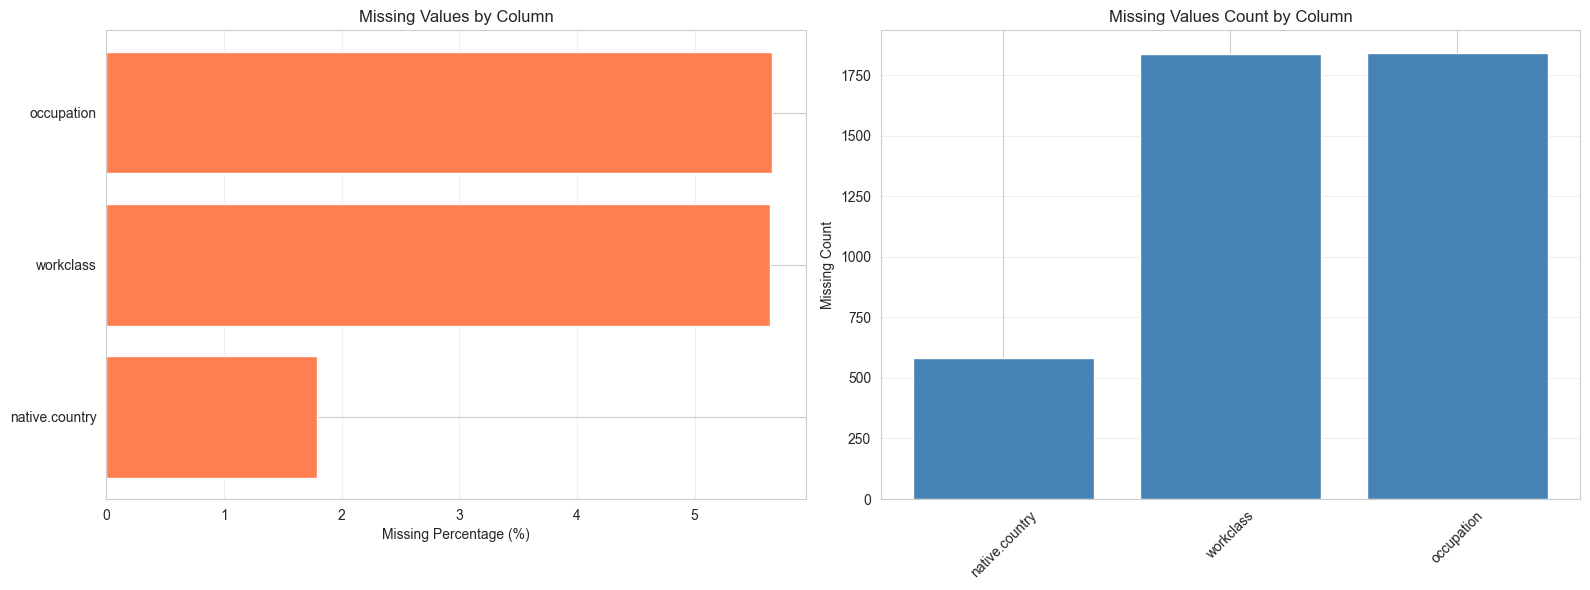

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cols_with_missing = missing_info[missing_info['Total_Missing'] > 0]['Column'].tolist()

if len(cols_with_missing) > 0:
    missing_data = missing_info[missing_info['Total_Missing'] > 0].sort_values('Total_Missing_Percentage')
    
    axes[0].barh(missing_data['Column'], missing_data['Total_Missing_Percentage'], color='coral')
    axes[0].set_xlabel('Missing Percentage (%)')
    axes[0].set_title('Missing Values by Column')
    axes[0].grid(axis='x', alpha=0.3)
    
    axes[1].bar(missing_data['Column'], missing_data['Total_Missing'], color='steelblue')
    axes[1].set_ylabel('Missing Count')
    axes[1].set_title('Missing Values Count by Column')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)
else:
    axes[0].text(0.5, 0.5, 'No Missing Values Found', ha='center', va='center', fontsize=14)
    axes[1].text(0.5, 0.5, 'No Missing Values Found', ha='center', va='center', fontsize=14)
    axes[0].axis('off')
    axes[1].axis('off')

plt.tight_layout()
plt.savefig('../outputs/figures/01_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. 数值特征分析

### 4.1 识别数值特征并生成描述性统计
###  为什么要分析数值特征分布？

**三个关键原因：**

1. **异常值检测准备**：
   - 正态分布 → 可用±3σ规则
   - 偏态分布 → 应用IQR方法或百分位数方法
   
2. **特征工程决策**：
   - 严重右偏（如收入） → 考虑对数转换
   - 双峰分布 → 可能需要分类处理
   
3. **模型选择指导**：
   - 线性模型对特征分布敏感
   - 树模型对分布不敏感

**分析工具选择**：
- **直方图（Histogram）**：查看分布形状、峰度、偏度
- **箱线图（Box Plot）**：识别异常值和四分位数
- **描述性统计**：提供精确的数值指标

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")
print(f"\nTotal: {len(numerical_cols)} numerical columns")

print("\n=== Descriptive Statistics ===")
display(df[numerical_cols].describe())

Numerical columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Total: 6 numerical columns

=== Descriptive Statistics ===


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 4.2 数值特征分布可视化

**📊 图表说明**：
- **直方图矩阵**：每个子图显示一个数值特征的频率分布
- **意义**：
  - 查看数据是否**正态分布**（钟形）还是**偏态分布**（左偏/右偏）
  - 发现**离群值**（远离主分布的孤立值）
  - 识别**多峰分布**（可能暗示有隐藏的子群体）

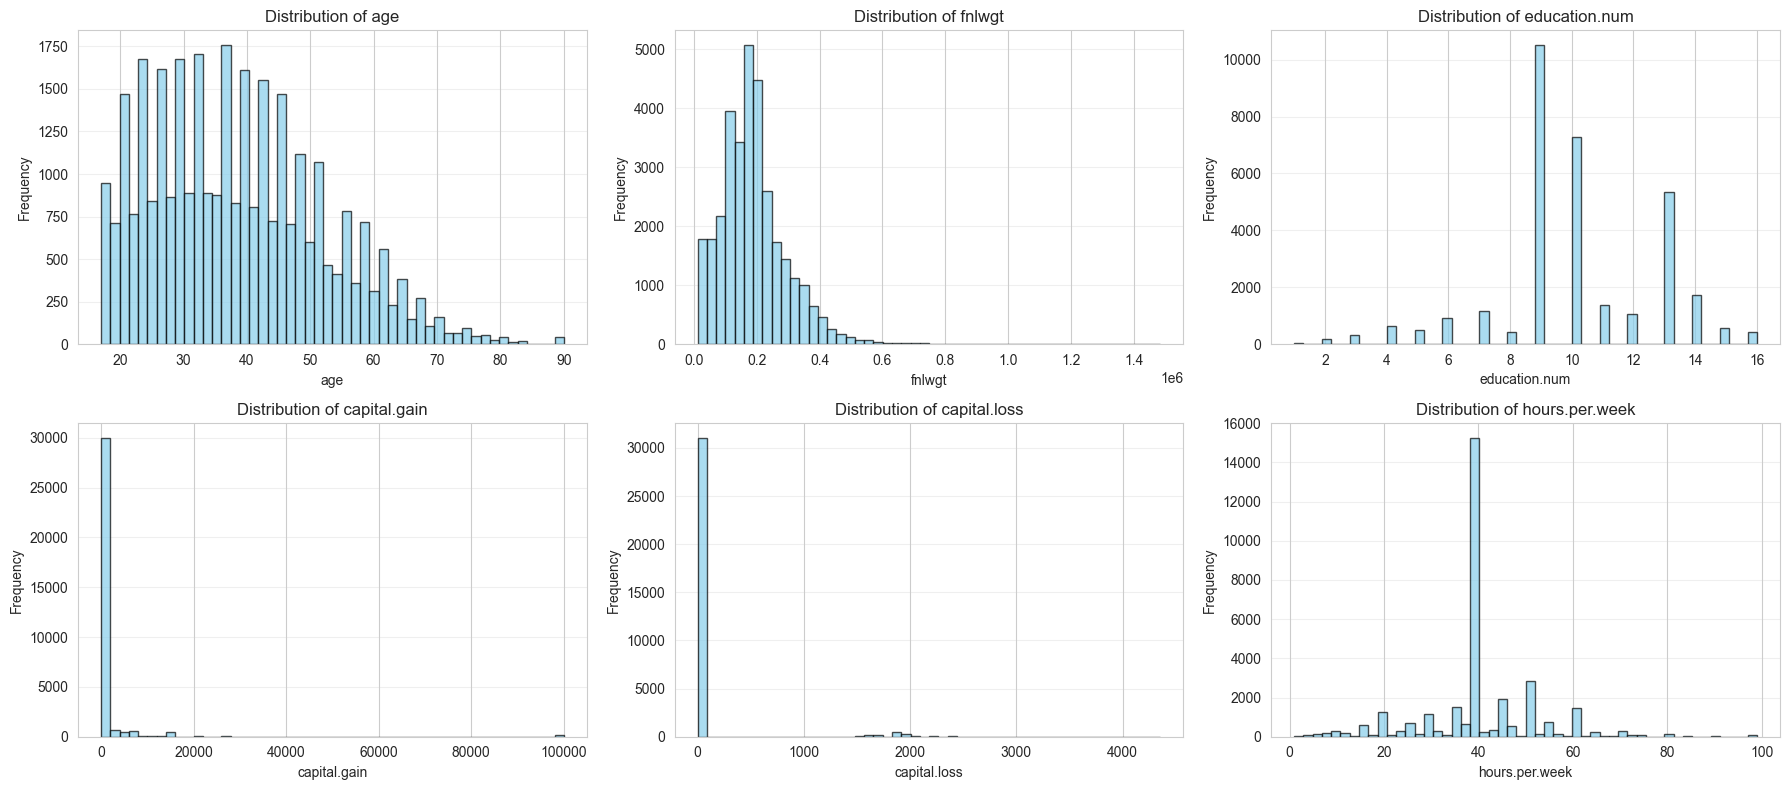

In [8]:
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(n_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('../outputs/figures/01_numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Box Plot检测异常值

**📊 图表说明**：
- **箱线图结构**：
  - 箱体 = 数据的中间50%（Q1到Q3）
  - 红线 = 中位数
  - 须线 = 正常数据范围
  - **圆点 = 异常值**（超出须线的点）
- **意义**：快速定位需要处理的极端值（如年龄200岁、工资负数等）

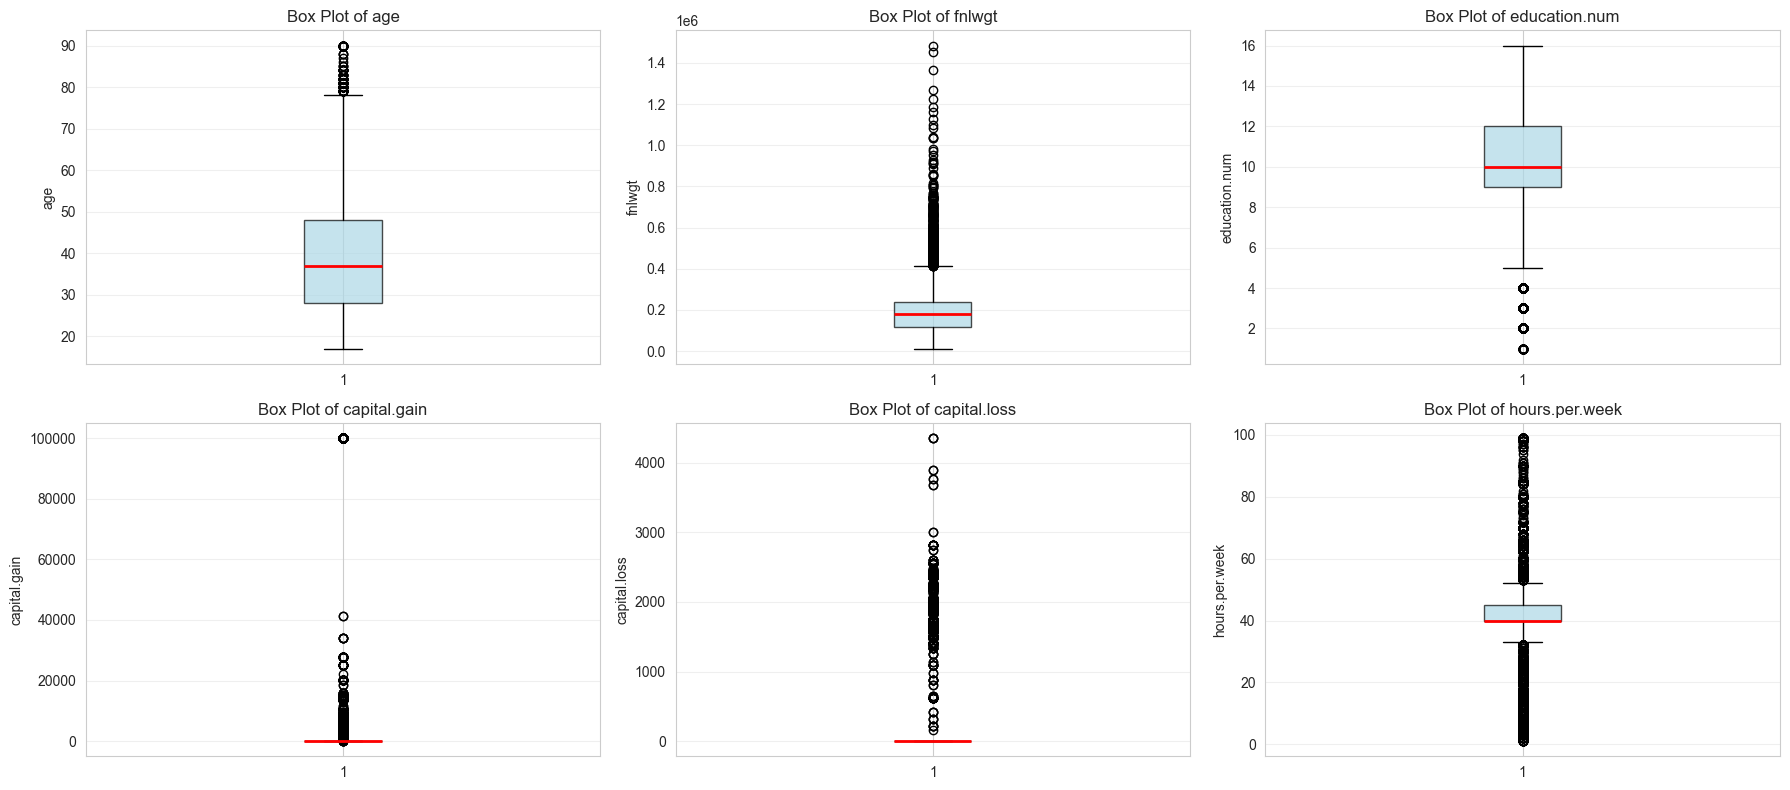

In [9]:
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_ylabel(col)
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(n_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('../outputs/figures/01_numerical_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.4 异常值统计

In [10]:
def detect_outliers_iqr(df, column):
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return {
        'column': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': len(outliers),
        'outlier_percentage': round(len(outliers) / len(df) * 100, 2)
    }

outlier_info = [detect_outliers_iqr(df, col) for col in numerical_cols]
outlier_df = pd.DataFrame(outlier_info)

print("=== Outlier Analysis (IQR Method) ===")
display(outlier_df)

=== Outlier Analysis (IQR Method) ===


,column,Q1,Q3,IQR,lower_bound,upper_bound,outlier_count,outlier_percentage
0,age,28.0,48.0,20.0,-2.0,78.0,143,0.44
1,fnlwgt,117827.0,237051.0,119224.0,-61009.0,415887.0,992,3.05
2,education.num,9.0,12.0,3.0,4.5,16.5,1198,3.68
3,capital.gain,0.0,0.0,0.0,0.0,0.0,2712,8.33
4,capital.loss,0.0,0.0,0.0,0.0,0.0,1519,4.67
5,hours.per.week,40.0,45.0,5.0,32.5,52.5,9008,27.66


## 5. 类别特征分析

### 5.1 识别类别特征

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")
print(f"\nTotal: {len(categorical_cols)} categorical columns")

Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

Total: 9 categorical columns


### 5.2 类别特征基本统计

In [12]:
categorical_info = pd.DataFrame({
    'Column': categorical_cols,
    'Unique_Count': [df[col].nunique() for col in categorical_cols],
    'Most_Frequent': [df[col].mode()[0] if len(df[col].mode()) > 0 else None for col in categorical_cols],
    'Most_Frequent_Count': [df[col].value_counts().iloc[0] if len(df[col]) > 0 else 0 for col in categorical_cols],
    'Most_Frequent_Percentage': [(df[col].value_counts().iloc[0] / len(df) * 100).round(2) if len(df[col]) > 0 else 0 for col in categorical_cols]
})

print("=== Categorical Features Summary ===")
display(categorical_info)

=== Categorical Features Summary ===


,Column,Unique_Count,Most_Frequent,Most_Frequent_Count,Most_Frequent_Percentage
0,workclass,9,Private,22696,69.70
1,education,16,HS-grad,10501,32.25
2,marital.status,7,Married-civ-spouse,14976,45.99
3,occupation,15,Prof-specialty,4140,12.71
4,relationship,6,Husband,13193,40.52
5,race,5,White,27816,85.43
6,sex,2,Male,21790,66.92
7,native.country,42,United-States,29170,89.59
8,income,2,<=50K,24720,75.92


### 5.3 类别特征分布可视化（Top 10类别）

📊 **图表说明：**
- 展示各类别型字段的前10个最常见取值及其频次（柱状图）
- 帮助识别数据分布的集中度（如是否某一类别占绝对多数）
- 关注点：是否存在极度不平衡的类别（某一类超过80%），这可能导致模型偏向多数类

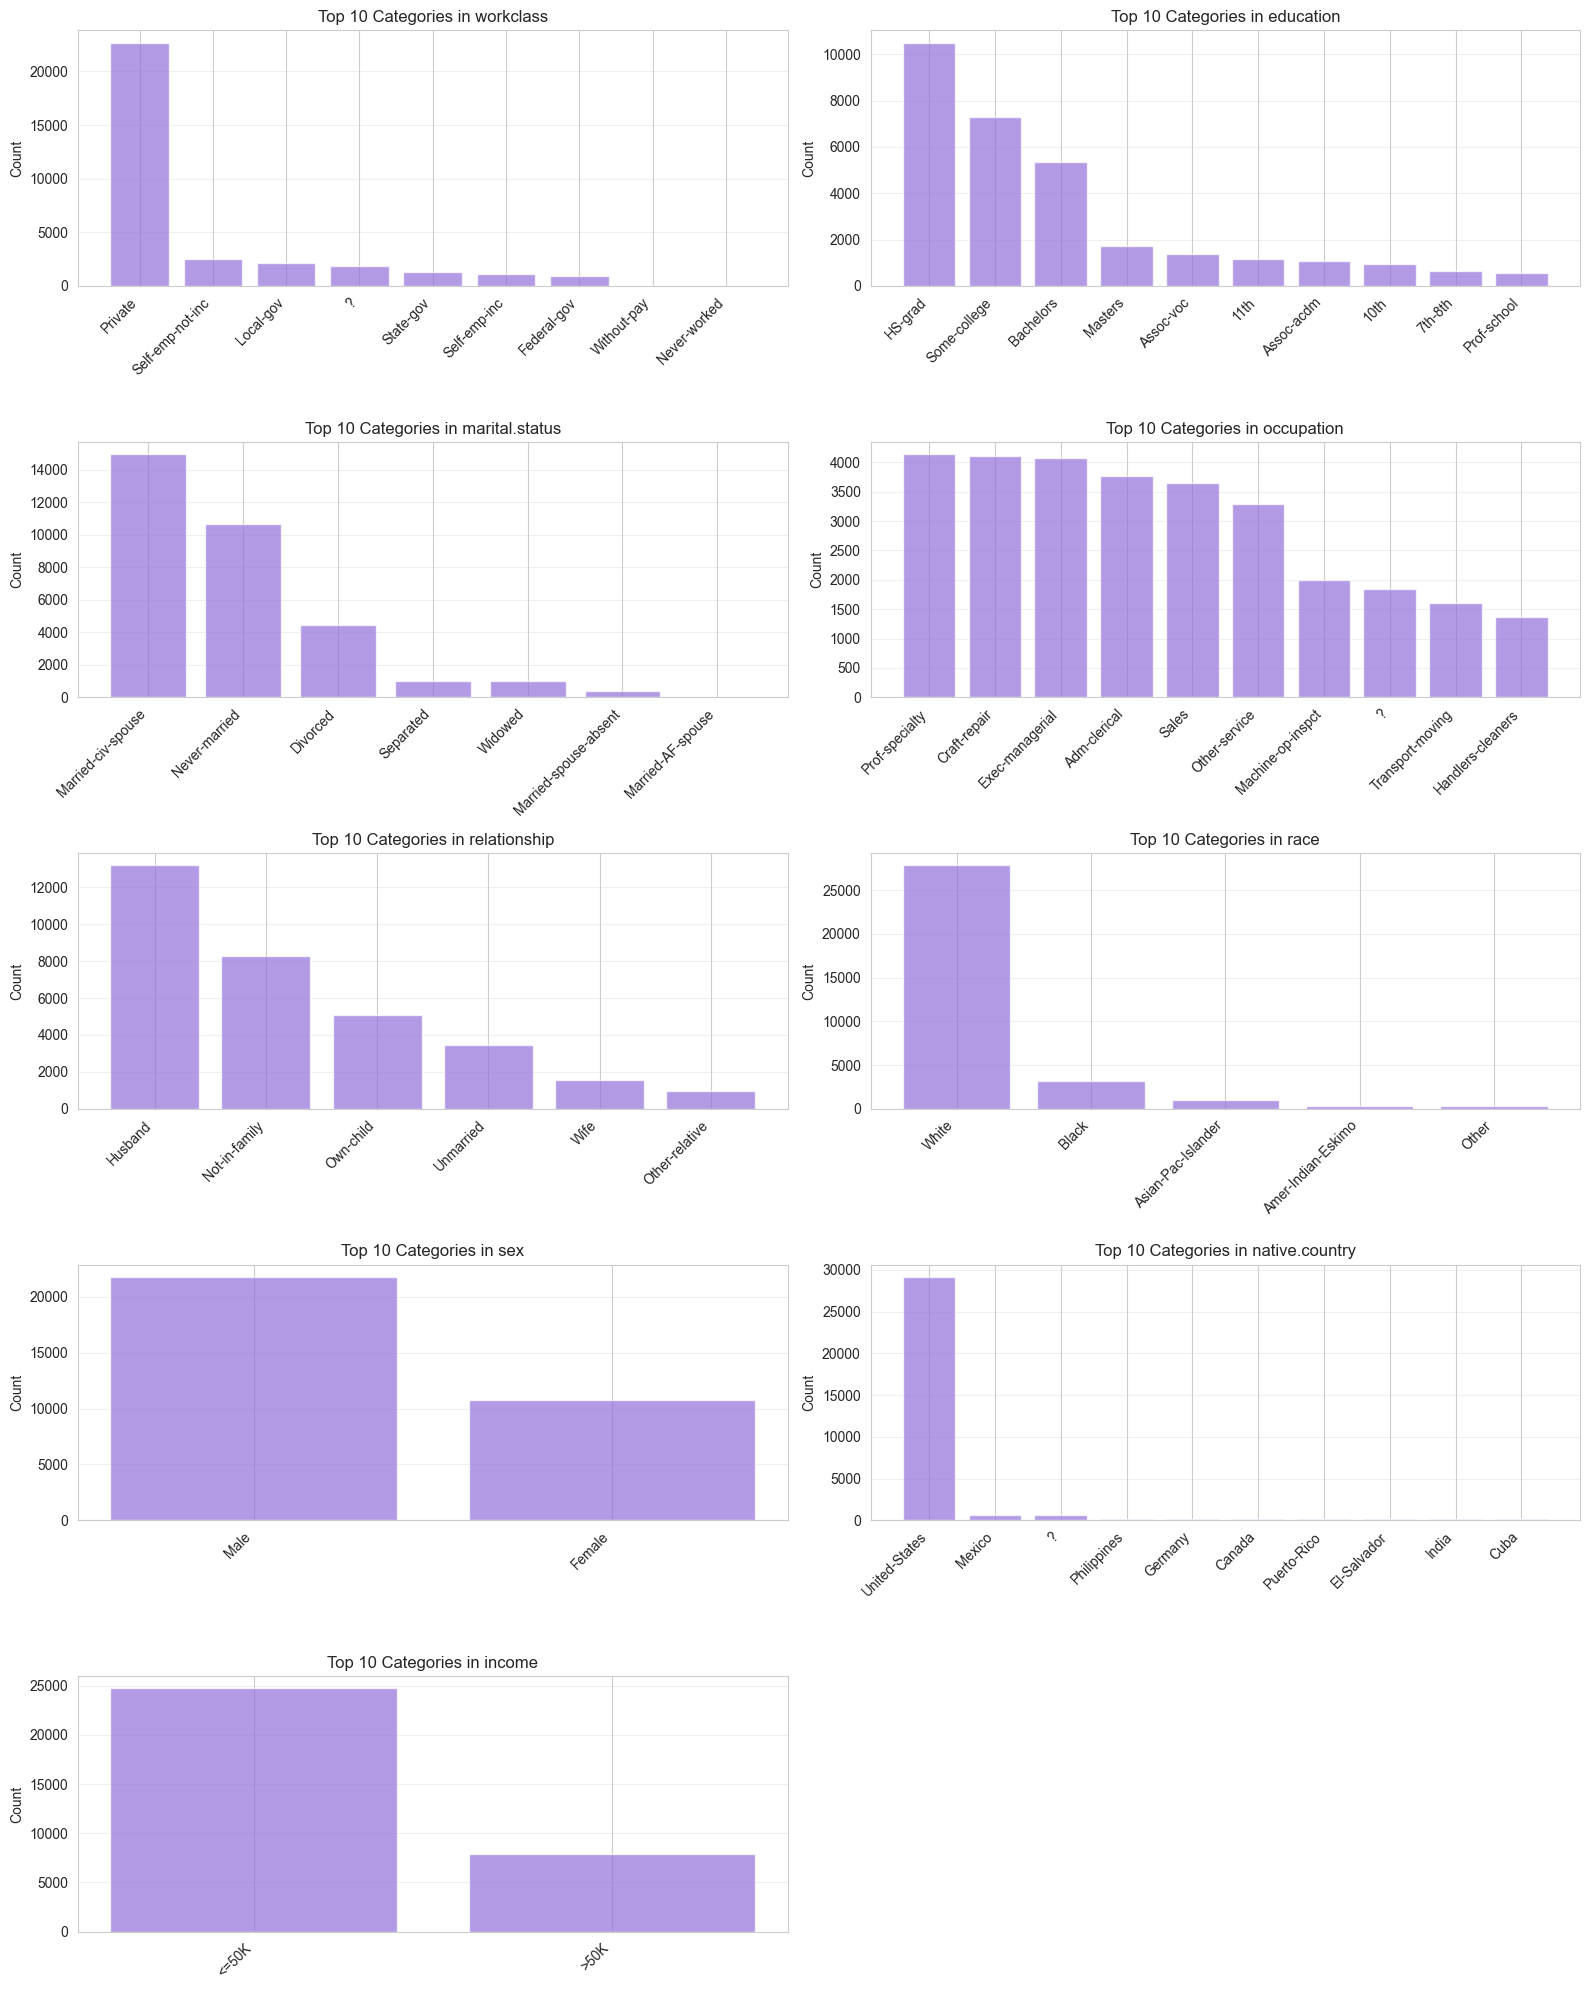

In [13]:
n_cat_cols = len(categorical_cols)
n_cat_rows = (n_cat_cols + 1) // 2

fig, axes = plt.subplots(n_cat_rows, 2, figsize=(16, n_cat_rows * 4))
axes = axes.flatten() if n_cat_cols > 1 else [axes]

for idx, col in enumerate(categorical_cols):
    top_categories = df[col].value_counts().head(10)
    axes[idx].bar(range(len(top_categories)), top_categories.values, color='mediumpurple', alpha=0.7)
    axes[idx].set_xticks(range(len(top_categories)))
    axes[idx].set_xticklabels(top_categories.index, rotation=45, ha='right')
    axes[idx].set_title(f'Top 10 Categories in {col}')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(n_cat_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('../outputs/figures/01_categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. 重复项检测

In [14]:
duplicate_rows = df.duplicated().sum()
duplicate_percentage = (duplicate_rows / len(df) * 100).round(2)

print("=== Duplicate Analysis ===")
print(f"Total duplicate rows: {duplicate_rows}")
print(f"Percentage of duplicates: {duplicate_percentage}%")

if duplicate_rows > 0:
    print("\n=== Sample Duplicate Rows ===")
    display(df[df.duplicated(keep=False)].head(10))

=== Duplicate Analysis ===
Total duplicate rows: 24
Percentage of duplicates: 0.07%

=== Sample Duplicate Rows ===


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
6227,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
7615,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
7978,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8356,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8500,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9067,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
9269,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
9305,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


## 7. 目标变量分析

📊 **图表说明：**
- 左图（柱状图）：展示两个收入类别的绝对数量对比
- 右图（饼图）：展示两个收入类别的比例关系
- 关注点：**类别不平衡比率（Class balance ratio）**，如果低于30%说明存在明显类别不平衡，需要在后续建模时考虑采样策略（如SMOTE）

=== Target Variable Distribution ===
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Class balance ratio: 31.72%


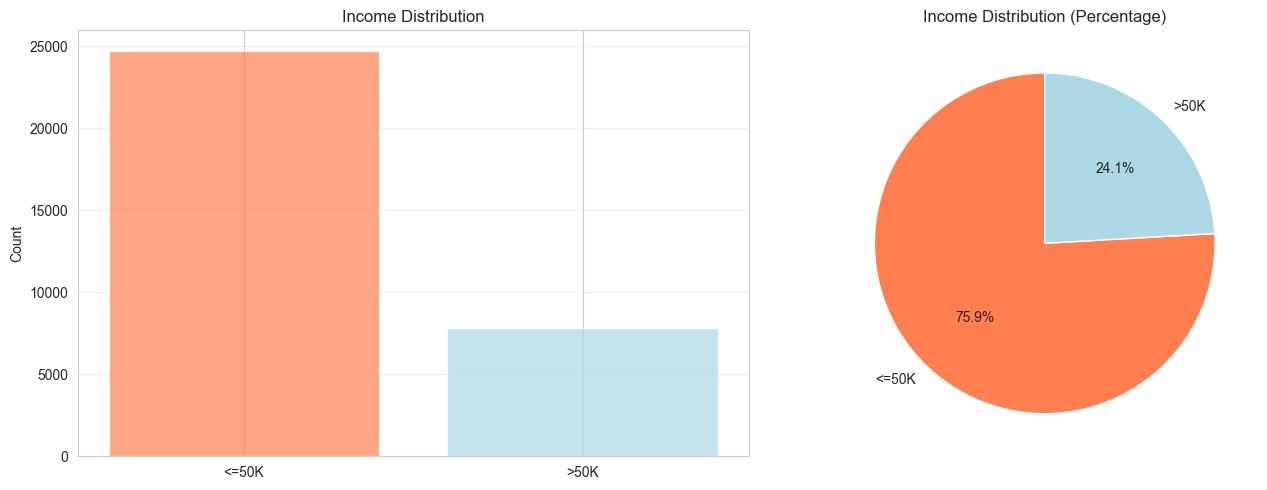

In [15]:
target_col = 'income'

if target_col in df.columns:
    print("=== Target Variable Distribution ===")
    target_counts = df[target_col].value_counts()
    print(target_counts)
    print(f"\nClass balance ratio: {(target_counts.min() / target_counts.max() * 100).round(2)}%")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].bar(target_counts.index, target_counts.values, color=['coral', 'lightblue'], alpha=0.7)
    axes[0].set_title('Income Distribution')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)
    
    axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
               colors=['coral', 'lightblue'], startangle=90)
    axes[1].set_title('Income Distribution (Percentage)')
    
    plt.tight_layout()
    plt.savefig('../outputs/figures/01_target_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(f"Target column '{target_col}' not found in dataset.")

## 8. 数据质量总结报告

In [16]:
print("="*80)
print("DATA PROFILING SUMMARY REPORT")
print("="*80)

print("\n1. DATASET OVERVIEW")
print(f"   - Total Records: {df.shape[0]:,}")
print(f"   - Total Features: {df.shape[1]}")
print(f"   - Numerical Features: {len(numerical_cols)}")
print(f"   - Categorical Features: {len(categorical_cols)}")

print("\n2. DATA COMPLETENESS")
total_missing = missing_info['Total_Missing'].sum()
total_cells = df.shape[0] * df.shape[1]
print(f"   - Total Missing Values: {total_missing:,}")
print(f"   - Overall Completeness: {((1 - total_missing/total_cells) * 100).round(2)}%")
if len(cols_with_missing) > 0:
    print(f"   - Columns with Missing Values: {len(cols_with_missing)}")
    print(f"   - Columns: {', '.join(cols_with_missing)}")

print("\n3. DATA QUALITY ISSUES")
print(f"   - Duplicate Rows: {duplicate_rows:,} ({duplicate_percentage}%)")
total_outliers = outlier_df['outlier_count'].sum()
print(f"   - Total Outliers (IQR method): {total_outliers:,}")

if target_col in df.columns:
    print("\n4. TARGET VARIABLE")
    print(f"   - Column: {target_col}")
    print(f"   - Classes: {df[target_col].nunique()}")
    print(f"   - Class Balance: {(target_counts.min() / target_counts.max() * 100).round(2)}%")

print("\n5. KEY FINDINGS")
print("   - 需要在EDA阶段进一步检查缺失值模式")
print("   - 需要分析异常值的合理性")
print("   - 需要检查类别不平衡问题")
print("   - 需要在后续阶段处理'?'标记的缺失值")

print("\n" + "="*80)
print("End of Data Profiling Report")
print("="*80)

DATA PROFILING SUMMARY REPORT

1. DATASET OVERVIEW
   - Total Records: 32,561
   - Total Features: 15
   - Numerical Features: 6
   - Categorical Features: 9

2. DATA COMPLETENESS
   - Total Missing Values: 4,262
   - Overall Completeness: 99.13%
   - Columns with Missing Values: 3
   - Columns: occupation, workclass, native.country

3. DATA QUALITY ISSUES
   - Duplicate Rows: 24 (0.07%)
   - Total Outliers (IQR method): 15,572

4. TARGET VARIABLE
   - Column: income
   - Classes: 2
   - Class Balance: 31.72%

5. KEY FINDINGS
   - 需要在EDA阶段进一步检查缺失值模式
   - 需要分析异常值的合理性
   - 需要检查类别不平衡问题
   - 需要在后续阶段处理'?'标记的缺失值

End of Data Profiling Report


## 9. 数据画像完成

In [17]:
print("✓ Data profiling completed successfully!")
print("\nGenerated outputs:")
print("  - 5 visualization charts saved in ../outputs/figures/")
print("  - Key findings documented in notebook markdown cells")

✓ Data profiling completed successfully!

Generated outputs:
  - 5 visualization charts saved in ../outputs/figures/
  - Key findings documented in notebook markdown cells
